# PROCESS

## Import Packages
Let's start by loading the libraries we would need for processing and visualizing the data.

In [1]:
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualisation
import datetime as dt # date time
import os # file handling

## Import data
Next, we'll load the fitbit datasets we're interested in exploring for insights.

In [2]:
# File path to all csv
dir_path = '../Data/'

# Read all CSVs into DataFrames
daily_activity = pd.read_csv(f'{dir_path}dailyActivity_merged.csv')
hourly_steps = pd.read_csv(f'{dir_path}hourlySteps_merged.csv')
hourly_calories = pd.read_csv(f'{dir_path}hourlyCalories_merged.csv')
sleepday = pd.read_csv(f'{dir_path}sleepDay_merged.csv')
daily_calories = pd.read_csv(f'{dir_path}dailyCalories_merged.csv')
daily_intensity = pd.read_csv(f'{dir_path}dailyCalories_merged.csv')
weight_log = pd.read_csv(f'{dir_path}weightLogInfo_merged.csv')
daily_steps = pd.read_csv(f'{dir_path}dailySteps_merged.csv')
heartrate_secs = pd.read_csv(f"{dir_path}heartrate_seconds_merged.csv")

# Dictionary containing DataFrame variables and their names
dfs = {
    'daily_activity': daily_activity,
    'hourly_steps': hourly_steps,
    'hourly_calories': hourly_calories,
    'sleepday': sleepday,
    'daily_calories': daily_calories,
    'daily_intensity': daily_intensity,
    'weight_log': weight_log,
    'daily_steps': daily_steps,
    'heartrate_secs': heartrate_secs
}

## EDA
Let's explore our data by viewing some statistical information about them.
We'll start by pulling the first 5 rows of each dataset.

In [3]:
# Display each DataFrame along with its name
for name, df in dfs.items():
    print(f"DataFrame Name: {name}")
    display(df.head())
    print("_"*50)

DataFrame Name: daily_activity


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


__________________________________________________
DataFrame Name: hourly_steps


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


__________________________________________________
DataFrame Name: hourly_calories


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


__________________________________________________
DataFrame Name: sleepday


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


__________________________________________________
DataFrame Name: daily_calories


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


__________________________________________________
DataFrame Name: daily_intensity


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


__________________________________________________
DataFrame Name: weight_log


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


__________________________________________________
DataFrame Name: daily_steps


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


__________________________________________________
DataFrame Name: heartrate_secs


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


__________________________________________________


Let's view the columns and their data types in each dataset.

In [4]:
for name, df in dfs.items():
    print(f"DataFrame Name: {name}")
    print(df.info())
    print("_"*50)

DataFrame Name: daily_activity
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-

The provided code iterates through each DataFrame in the `dfs` dictionary and prints various information about each DataFrame:

- **Shape:** Displays the number of rows and columns in the DataFrame.
- **Unique ids:** Shows the count of unique IDs present in the 'Id' column of the DataFrame.
- **Nulls:** Prints the total count of null values in the entire DataFrame.
- **Duplicates:** Displays the count of duplicated rows in the DataFrame.

In [5]:
for name, df in dfs.items():
    print(f"DataFrame Name: {name}")
    print("Shape: ",df.shape)
    print("Unique ids: ",df.Id.nunique())
    print("Nulls: ",df.isna().values.sum())
    print("Duplicates: ",df.duplicated().sum())
    print("_"*50)

DataFrame Name: daily_activity
Shape:  (940, 15)
Unique ids:  33
Nulls:  0
Duplicates:  0
__________________________________________________
DataFrame Name: hourly_steps
Shape:  (22099, 3)
Unique ids:  33
Nulls:  0
Duplicates:  0
__________________________________________________
DataFrame Name: hourly_calories
Shape:  (22099, 3)
Unique ids:  33
Nulls:  0
Duplicates:  0
__________________________________________________
DataFrame Name: sleepday
Shape:  (413, 5)
Unique ids:  24
Nulls:  0
Duplicates:  3
__________________________________________________
DataFrame Name: daily_calories
Shape:  (940, 3)
Unique ids:  33
Nulls:  0
Duplicates:  0
__________________________________________________
DataFrame Name: daily_intensity
Shape:  (940, 3)
Unique ids:  33
Nulls:  0
Duplicates:  0
__________________________________________________
DataFrame Name: weight_log
Shape:  (67, 8)
Unique ids:  8
Nulls:  65
Duplicates:  0
__________________________________________________
DataFrame Name: daily_step

## SUMMARY OF INITIAL FINDINGS

### Insights from Data Analysis:
- Among the datasets inspected, `heartrate_secs` and `weight_logged` fall below the n>=**30** rule and will be dropped due to insufficient data (n=**14** and n=**8**, respectively). `sleepday` has n=**24**, which is also relatively small but will be retained for potential insights.
- Datasets `daily_calories`, `daily_intensity`, and `daily_steps` offer redundant data compared to `daily_activity`; therefore, they will be discarded.
- `hourly_steps` and `hourly_calories` share similar structures and might be merged for deeper analysis.
- The data types of specific columns need to be converted to the datetime data type for ease of processing (`ActivityDate` in `daily_activity`, `ActivityHour` in `hourly_steps` and `hourly_calories`, and `SleepDay` in `sleepday`).
- No missing values or duplicates were observed in the datasets, except for `sleepday` which has **3** duplicate entries.

### Recommendations:
1. Drop `heartrate_secs` and `weight_logged` due to inadequate data.
2. Retain `sleepday` despite a small sample size but address the **3** duplicate entries.
3. Consider merging `hourly_steps` and `hourly_calories` for deeper analysis.
4. Convert relevant columns to datetime data type for consistency.


## Data Transformation

Let's start by converting the **"ActivityDate"** in `daily_activity`, **"ActivityHour"** in `hourly_steps`, **"ActivityHour"** in `hourly_calories`, and **"SleepDay"** in `sleepday` to datetime data type.



In [6]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

In [7]:
#Let's Check for Changes

print("Daily Acitivity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Hourly Steps data type is", hourly_steps["ActivityHour"].dtypes, "data type")
print("Hourly Calories data type is", hourly_calories["ActivityHour"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")

Daily Acitivity data type is datetime64[ns] data type
Hourly Steps data type is datetime64[ns] data type
Hourly Calories data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type


### Merge hourly_steps with hourly_calories datasets.

In [8]:
for col in hourly_steps.columns, hourly_calories.columns:
    print (col)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


Above we can see that they both share **Id** and **ActivityHour** in common. Hence, we'll merge them on **Id** and **ActivityHour**.

In [9]:
hourly_cals_steps = pd.merge(hourly_steps, hourly_calories,
                    on=['Id', 'ActivityHour'], how='inner')

hourly_cals_steps.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


### Create new colums

We added a new column labeled **"WeekDay"** to three separate DataFrames: `daily_activity`, `hourly_cals_steps`, and `sleepday` , using the `dt.day_name()` function.

In [10]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
hourly_cals_steps["WeekDay"] = hourly_cals_steps["ActivityHour"].dt.day_name()
sleepday["WeekDay"] = sleepday["SleepDay"].dt.day_name()

In [11]:
# View changes
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


We still need to make some changes to the `hourly_cals_steps` dataframe. We need to extract the **ActivityHour** column by creating a separate column for it.


In [12]:
hourly_cals_steps["DateHour"] = hourly_cals_steps["ActivityHour"].dt.hour
hourly_cals_steps.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,DateHour
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4


Now that we have our **DateHour**, lets remove the Hour min and sec.

In [13]:
hourly_cals_steps["ActivityDay"] = hourly_cals_steps["ActivityHour"].dt.date

Now, let's drop **ActivityHour**

In [14]:
hourly_cals_steps = hourly_cals_steps.drop("ActivityHour", axis = 1)
hourly_cals_steps.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [15]:
# Let's change ActivityDay to DateTime data type
hourly_cals_steps["ActivityDay"] = pd.to_datetime(hourly_cals_steps["ActivityDay"])

Next, we're going to merge `sleepday` with `hourly_cals_steps` to create a new dataframe that contains `sleepday` record with calories for some analysis. Hence, before we do, let's change the column name **SleepDay** in `sleepday df`, so it matches **ActivityDay** in `hourly_cals_steps`.

In [16]:
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


Now, let's merge `sleepday` with `hourly_cals_steps`. But first, let's see the columns they share in common.

In [17]:
for col in hourly_cals_steps.columns, sleepday.columns:
    print (col)

Index(['Id', 'StepTotal', 'Calories', 'WeekDay', 'DateHour', 'ActivityDay'], dtype='object')
Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


Since they have **Id**, **ActivityDay**, and **WeekDay** in common, we'll merge both dataframes on **Id**, **ActivityDay**, and **WeekDay**.


In [18]:
hourly_cals_steps_sleep = pd.merge(hourly_cals_steps, sleepday,
                    on=['Id', 'ActivityDay', 'WeekDay'], how='inner')

hourly_cals_steps_sleep.head(5)

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


Let's see how many unique users and missing values we have in our new dataframe

In [19]:
dfs2 = {'hourly_cals_steps_sleep':hourly_cals_steps_sleep}
for name, df in dfs2.items():
    print(f"DataFrame Name: {name}")
    print("Shape: ",df.shape)
    print("Unique ids: ",df.Id.nunique())
    print("Nulls: ",df.isna().values.sum())
    print("Duplicates: ",df.duplicated().sum())
    print("_"*50)

DataFrame Name: hourly_cals_steps_sleep
Shape:  (9771, 9)
Unique ids:  24
Nulls:  0
Duplicates:  72
__________________________________________________


Great! Let's also make some changes to the `daily_activity` dataframe. We'll start by creating two additional columns (**TotalActiveMinutes** and **TotalActiveHours**), alongside removing some columns we won't need.


In [20]:
new_cols = ["Id", "ActivityDate", 
            "WeekDay", "TotalSteps", 
            "TotalDistance", "VeryActiveDistance", 
            "ModeratelyActiveDistance", "LightActiveDistance", 
            "SedentaryActiveDistance", "VeryActiveMinutes", 
            "FairlyActiveMinutes", "LightlyActiveMinutes", 
            "SedentaryMinutes", "TotalActiveMinutes", 
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)

In [21]:
# Let's view the changes.
daily_activity[["TotalActiveMinutes",
                "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


Awesome! The **TotalActiveMinutes** and **TotalMinutes** columns have been created, but they currently don't have any values since they have not been filled.

To populate the **TotalActiveMinutes**, I will create the values by summing up all the active minutes, i.e., **VeryActiveMinutes**, **FairlyActiveMinutes**, and **LightActiveMinutes**. Additionally, for the **TotalMinutes**, I will sum up the **TotalActiveMinutes** and the **SedentaryMinutes**.


In [22]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


In [23]:
daily_activity.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,366,1094,6.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,257,1033,4.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,222,1440,4.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,272,998,5.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,267,1040,4.0,1863


# ANALYZE

Now that our data is processed, it's time to analyze it for insights. We have narrowed down our datasets to three dataframes:

- `daily_activity`
- `hourly_cals_steps`
- `hourly_cals_steps_sleep`

So, we're going to draw our insights from these dataframes. Let's start by getting some statistical info about them.

In [24]:
print("Dataframe name: daily_activity")
display(daily_activity.describe())
print("-" * 50)

print("Dataframe name: hourly_cals_steps_sleep")
display(hourly_cals_steps_sleep.describe())
print("-" * 50)

print("Dataframe name: hourly_cals_steps")
display(hourly_cals_steps.describe())
print("-" * 50)


Dataframe name: daily_activity


,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


--------------------------------------------------
Dataframe name: hourly_cals_steps_sleep


,Id,StepTotal,Calories,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


--------------------------------------------------
Dataframe name: hourly_cals_steps


,Id,StepTotal,Calories,DateHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


--------------------------------------------------


## Some Key Findings

- Out of 1218 total minutes, 991 minutes were spent inactive (Sedentary), while approximately 228 minutes were active.
- On average, users took 7638 total steps daily.
- The average daily calorie burn is 2304.
- There exists a positive correlation between the number of steps taken and the calories burnt.


# SHARE
Now is time to do some data visualization.

## CORRELATION MATRIX

Let's explore the correlation between the following variables:
- TotalDistance
- TotalSteps
- SedentaryMinutes
- TotalActiveMinutes
- Calories


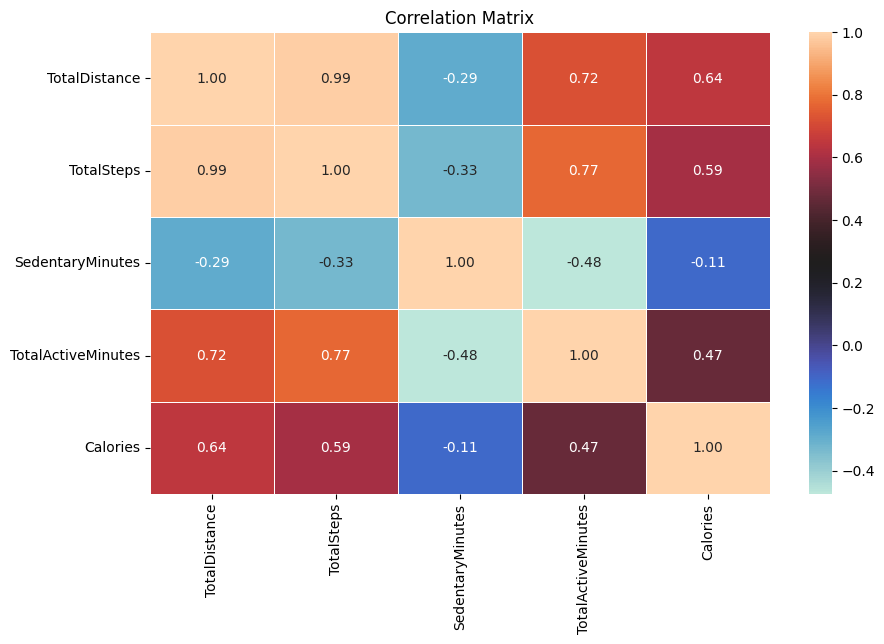

In [25]:
Corr1 = ["TotalDistance", "TotalSteps", 
         "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(daily_activity[Corr1].corr(), 
            annot = True, 
            fmt = ".2f",
            linewidths=0.5,
           cmap="icefire")

ax.set_title('Correlation Matrix');

### Correlation Insights

- There is a positive correlation between **Calories** and **TotalActiveMinutes**, **TotalSteps**, and **TotalDistance**.
- Conversely, there is a negative correlation between **Calories** and **SedentaryMinutes**.


## COMPARING TOTAL STEPS AND SEDENTARY MINUTES TO CALORIES

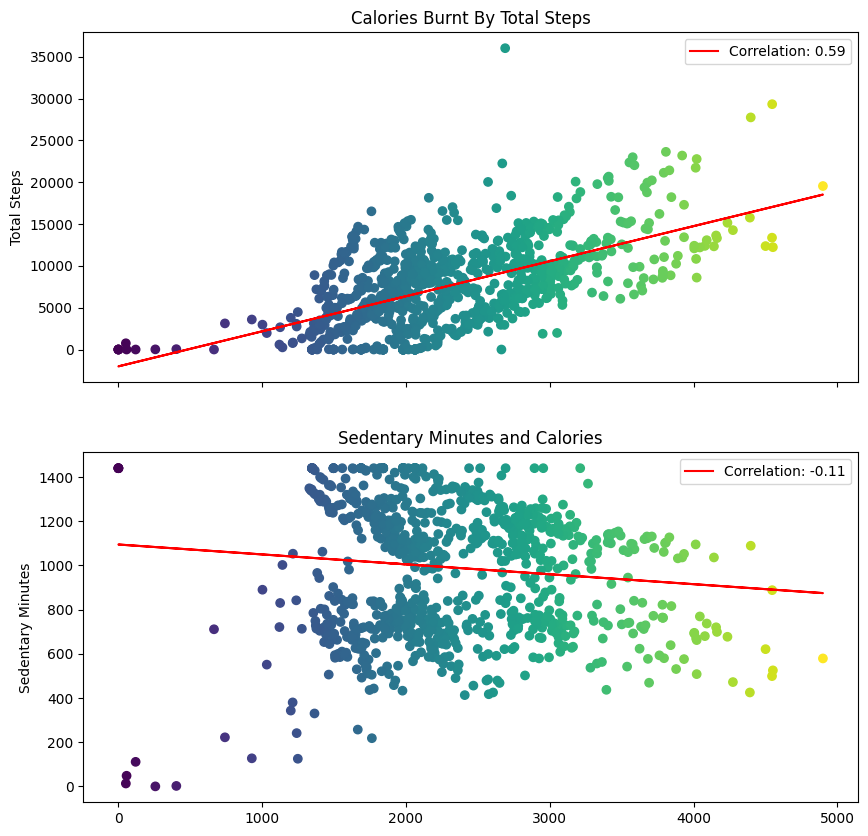

In [32]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Scatter plot for Calories vs. TotalSteps
scatter0 = ax0.scatter(x=daily_activity["Calories"], y=daily_activity["TotalSteps"], c=daily_activity["Calories"], cmap='viridis')
ax0.set(title="Calories Burnt By Total Steps", ylabel="Total Steps")
ax0.legend(*scatter0.legend_elements(), title=None)

# Calculate and plot correlation line for Calories vs. TotalSteps
corr_coeff0 = np.corrcoef(daily_activity["Calories"], daily_activity["TotalSteps"])[0, 1]
line0 = np.polyfit(daily_activity["Calories"], daily_activity["TotalSteps"], 1)
ax0.plot(daily_activity["Calories"], line0[0] * daily_activity["Calories"] + line0[1], color='red', label=f'Correlation: {corr_coeff0:.2f}')
ax0.legend()

# Scatter plot for Calories vs. SedentaryMinutes
scatter1 = ax1.scatter(x=daily_activity["Calories"], y=daily_activity["SedentaryMinutes"], c=daily_activity["Calories"], cmap='viridis')
ax1.set(title="Sedentary Minutes and Calories", ylabel="Sedentary Minutes")
ax1.legend(*scatter1.legend_elements(), title=None)

# Calculate and plot correlation line for Calories vs. SedentaryMinutes
corr_coeff1 = np.corrcoef(daily_activity["Calories"], daily_activity["SedentaryMinutes"])[0, 1]
line1 = np.polyfit(daily_activity["Calories"], daily_activity["SedentaryMinutes"], 1)
ax1.plot(daily_activity["Calories"], line1[0] * daily_activity["Calories"] + line1[1], color='red', label=f'Correlation: {corr_coeff1:.2f}')
ax1.legend()

plt.show()


###  Scatterplot Analysis Insights

- This scatterplot provides a clearer insight into the correlation between **TotalSteps** and **SedentaryMinutes** concerning **Calories**.
- Increased steps taken are associated with a higher calorie burn. Conversely, higher SedentaryMinutes are linked to lower calorie expenditure.


## SEDENTARY MINUTES VS TOTAL ACTIVE MINUTES`

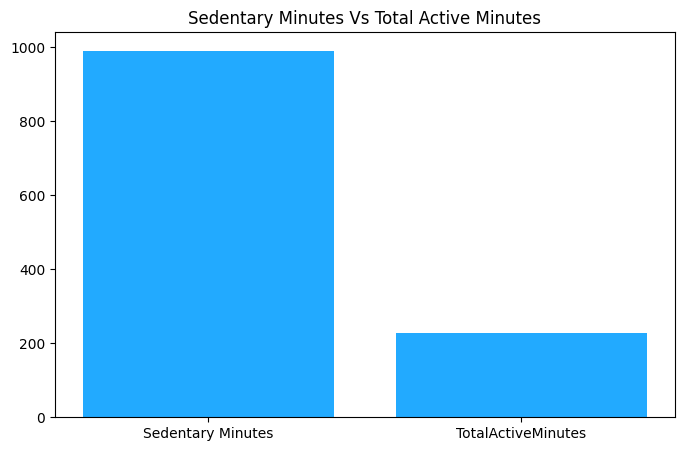

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.array(["Sedentary Minutes", "TotalActiveMinutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["TotalActiveMinutes"].mean()])

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y, width = 0.8, color = "#22aaff")
plt.show()             

### Sedentary vs. Active Lifestyle

- There is a substantial gap between **SedentaryMinutes** and **TotalActiveMinutes**.
- Users spend significantly more time sitting or lying down than being active, suggesting a lifestyle or occupation that involves prolonged periods of desk work or sedentary activities.

## TOTAL CALORIES BURNT BY DAY OF THE WEEK

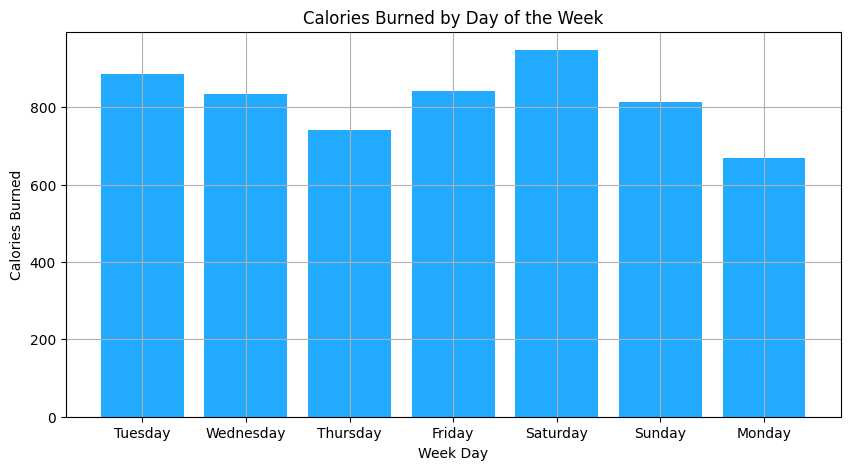

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(hourly_cals_steps.WeekDay, hourly_cals_steps.Calories, color = "#22aaff")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()

plt.show()

## Caloric Burn by Day Insight

- This plot highlights that the highest calorie burn occurred on Saturday, while the lowest was recorded on Monday.
- Saturday's higher calorie burn aligns with the weekend, potentially allowing users more time for exercise. However, the lower burn on Monday is unexpected, considering it's typically perceived as a busy workday.
- This raises the possibility that users might be significantly occupied at work on Mondays, potentially lacking sufficient time for exercise or breaks.


## TOTAL STEPS BY DAY OF THE WEEK


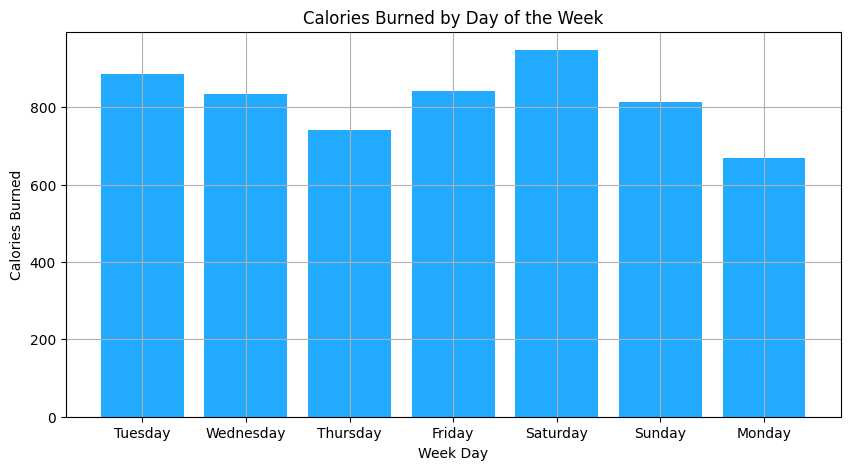

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(hourly_cals_steps.WeekDay, hourly_cals_steps.Calories, color = "#22aaff")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()

plt.show()

### Insight into Monday's Low Caloric Burn

- This analysis provides insight into why Monday recorded the lowest calories burnt. It reveals that users took the fewest steps on Monday compared to other days, suggesting prolonged periods of sitting at work desks.
- Additionally, this insight hints at the profile of surveyed users, indicating they are likely working-class individuals.
- Conversely, the most steps were taken on Saturday and Sunday, aligning with expectations for weekends.


## TOTAL TIME ASLEEP BY DAY OF THE WEEK

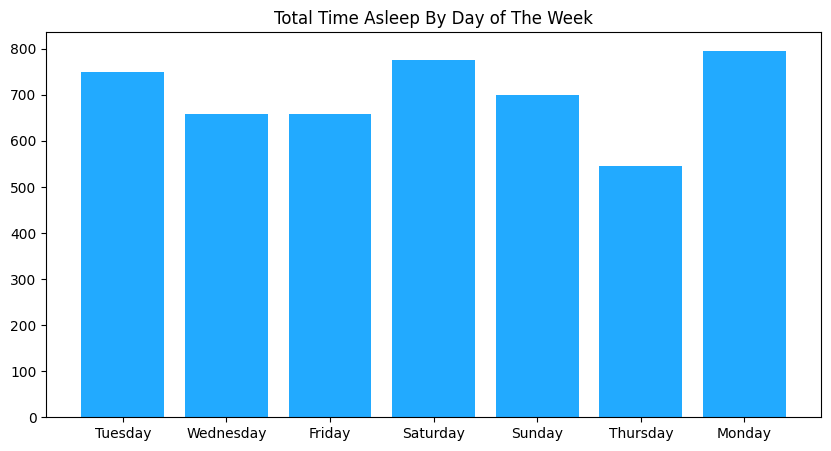

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
x = hourly_cals_steps_sleep["WeekDay"]
y = hourly_cals_steps_sleep["TotalMinutesAsleep"]

plt.title("Total Time Asleep By Day of The Week")
plt.bar(x, y, width = 0.8, color = "#22aaff")
plt.show() 

### Sleep Duration Analysis

- The analysis reveals that Thursday recorded the least sleep duration, whereas Monday had the longest sleep duration. Typically, longer sleep durations suggest increased exhaustion.
- Interestingly, users also had longer sleep durations on Saturday, Tuesday, and Sunday—coinciding with the days when they expended the most calories.


## THE MOST AND LEAST ACTIVE HOURS OF THE DAY

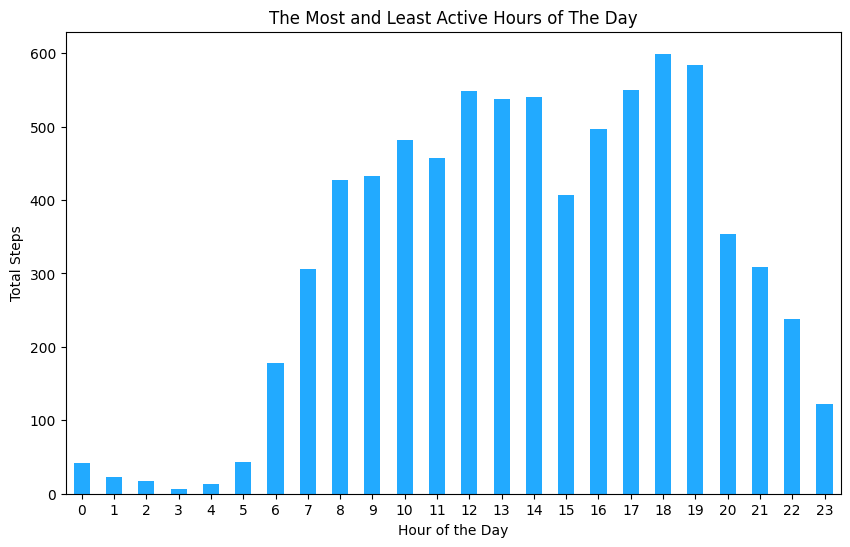

In [31]:
#Least active time of the day for targeted Ads

fig, axs = plt.subplots(figsize=(10, 6))
hourly_cals_steps.groupby(hourly_cals_steps['DateHour'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='#22aaff', title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

### Daily Activity Pattern

- The data illustrates a busy schedule from 8 a.m. to 7 p.m., indicating heightened activity during these hours.
- Conversely, the least active hours fall between 8 p.m. and 10 p.m., potentially indicating more downtime or relaxation during this period—suggested as optimal for targeted advertisements.


# ACT

## RECOMMENDATION

### Promotion Strategy:

- **Ad Scheduling**: Leveraging insights on reduced activity between 8 and 10 p.m., Bellabeat should schedule targeted ads during this period, aligning with typical bedtime for most adults as per the National Sleep Foundation's article ["How Sleep Works"](https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need).
- **Platform Utilization**: Utilize platforms like Google AdWords to schedule strategic ad placements, optimizing reach and cost-effectiveness during these hours.

### Retention Focus:

- **Tailored Content Creation**: Create tailored content that emphasizes the positive correlation found between daily steps and calorie burn. Forbes' article on ["Retention Strategies to Keep Customers Coming Back"](https://www.forbes.com/sites/forbesbusinesscouncil/2021/01/29/retention-strategies-to-keep-customers-coming-back/?sh=17d1e9454c0f) underlines the challenge of customer churn within the first two years of subscription.
- **Engagement Initiatives**: Engage users through challenges and tips on the Bellabeat website, encouraging activity and fostering a sense of community among users.

### Combatting Inactivity:

- **Education Campaign**: Launch educational campaigns, utilizing content such as videos and blogs to highlight the health risks associated with sedentary lifestyles. Reference the World Health Organization's report on ["Physical Inactivity: A Global Public Health Problem"](https://www.who.int/news-room/fact-sheets/detail/physical-activity) for factual backing.
- **App Feature Promotion**: Leverage these campaigns to promote specific features of the Bellabeat app, emphasizing its role in combatting sedentary behavior and promoting overall well-being.
